# Ramsey-Cass-Koopmans model

Ramsey model from Chapter 2 of D. Romer's *Advanced Economics* looks as follows...

\begin{align}
    \dot{k}(t) =& k(t)^{\alpha} - c(t) - (g + n + \delta)k(t),\\
    k(0) =& k_0 \\
    \dot{c}(t) =& \Bigg[\frac{1}{\theta} \bigg[\alpha k(t)^{\alpha - 1} - \delta - \rho - \theta g\bigg]\Bigg]c(t),\\
    lim_{t\rightarrow \infty} c(t) =& c^*
\end{align}

...where...

* Elasticity of output with respect to catpial: $0 < \alpha < 1$
* Coefficient of relative risk aversion: $0 < \theta$
* Discount rate: $0 < \rho$
* Breakeven investment: $0 < g + n + \delta$
* Convergent lifetime utility: $0 < \rho - n - (1 - \theta)g$

Note that we are assuming two things...

1. Cobb-Douglas production
2. Constant Relative Risk Aversion (CRRA) preferences



In [1]:
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sympy as sym
import pycollocation

In [3]:
#define some variables
t, k, c = sym.symbols ("t, k, c")

In [8]:
# define some production parameters
alpha, delta = sym.symbols ("alpha, delta")

# define growth rates
g, n = sym.symbols ("g, n")

# define some preference parameters
theta, rho = sym.symbols ("theta, rho") 

In [5]:
# define a production function

f = k**alpha
print f

k**alpha


In [6]:
# define a a flow utility function

u = (c**(1 - theta) - 1) / (1 - theta)

print u

(c**(-theta + 1) - 1)/(-theta + 1)


In [9]:
# define the equation of motion for capital (per unit of effective labour)

k_dot = f - c - (g + n + delta) * k

print k_dot


-c - k*(delta + g + n) + k**alpha


In [10]:
# define the Euler equation

c_dot = ((1 / theta) * (alpha * k**(alpha - 1) - delta - rho - theta * g))

print c_dot

(alpha*k**(alpha - 1) - delta - g*theta - rho)/theta


In [36]:
# create a dictionary representing the RHS of our model

rhs = {'k': k_dot, 'c': c_dot}
print rhs


{'k': -c - k*(delta + g + n) + k**alpha, 'c': (alpha*k**(alpha - 1) - delta - g*theta - rho)/theta}


In [37]:
# define the steady state value for capital (per unit effective labour)
k_star = (alpha / (delta + rho + theta * g))**(1 / (1- alpha))
print k_star

(alpha/(delta + g*theta + rho))**(1/(-alpha + 1))


In [38]:
# define the steady state value for consumption (pert unit of effective labour)
c_star = k_star**alpha - (g + n + delta) * k_star
print c_star

-(alpha/(delta + g*theta + rho))**(1/(-alpha + 1))*(delta + g + n) + ((alpha/(delta + g*theta + rho))**(1/(-alpha + 1)))**alpha


In [83]:
# define some boundary condition
k0 = 1.0

bcs = {'lower': [k - k0], 'upper': [c - c_star]}
print bcs

{'upper': [c + (alpha/(delta + g*theta + rho))**(1/(-alpha + 1))*(delta + g + n) - ((alpha/(delta + g*theta + rho))**(1/(-alpha + 1)))**alpha], 'lower': [k - 1.0]}


In [84]:
# finally we need to define some parameters...

params = {'alpha': 0.33, 'delta': 0.04, 'theta': 1.05, 'rho': 0.05, 'g': 0.02, 'n': 0.02 }

# Using pyCollocation

In [85]:
model = pycollocation.SymbolicBoundaryValueProblem(dependent_vars=['k', 'c'], 
                                                   independent_var='t',
                                                   rhs=rhs,
                                                   boundary_conditions=bcs,
                                                   params=params)

In [86]:
solver = pycollocation.OrthogonalPolynomialSolver(model)

In [87]:
# numeric version of steady state capital
def numeric_k_star(alpha, delta, theta, rho, g, n):
    return (alpha / (delta + rho + theta * g))**(1 / (1- alpha))

In [88]:
numeric_k_star(**params)

5.084580947867504

In [89]:
# define our domain of approximation
domain = [0.0,  100.0]

# initial guess for capital
N = 1000
ts = np.linspace(domain[0], domain[1], 1000)
ks = numeric_k_star(**params) - (numeric_k_star(**params) - k0) * np.exp(-ts)
initial_capital_polynomial = np.polynomial.Chebyshev.fit(ts, ks, 35, domain)


# initial guess for consumption
cs = np.log(ks)

nitial_consumption_polynomial = np.polynomial.Chebyshev.fit(ts, cs, 35, domain)

# create a dictionary of the coefs of our polynomials
initial_guess = {'k': initial_capital_polynomial.coef,
                'c': nitial_consumption_polynomial.coef}


In [90]:
solver.solve(kind="Chebyshev",
            coefs_dict=initial_guess,
            domain=domain)

In [91]:
# now create a visualizer for plot the solution....

visualizer = pycollocation.Visualizer(solver)

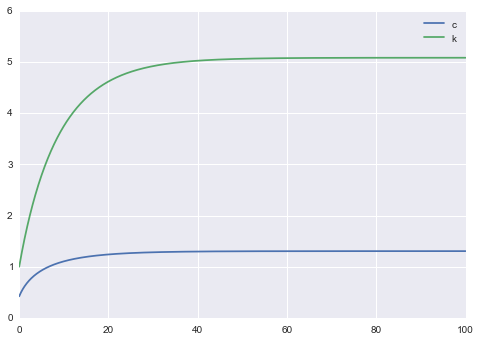

In [92]:
# plot the solution
visualizer.interpolation_knots = np.linspace(domain[0], domain[1], N)
visualizer.solution.plot()
plt.show()

In [95]:
solver.result.x

array([  4.37750916e+00,   1.27475259e+00,  -9.42267386e-01,
         5.83073656e-01,  -3.10702367e-01,   1.47472068e-01,
        -6.50772041e-02,   2.81104850e-02,  -1.25500653e-02,
         6.01370122e-03,  -3.11972357e-03,   1.72772936e-03,
        -1.00280761e-03,   6.01700228e-04,  -3.70142626e-04,
         2.32264004e-04,  -1.48162052e-04,   9.58373116e-05,
        -6.27356353e-05,   4.14930226e-05,  -2.76898109e-05,
         1.86211814e-05,  -1.26036904e-05,   8.57403383e-06,
        -5.85175883e-06,   3.99624040e-06,  -2.71902147e-06,
         1.82926946e-06,  -1.19932956e-06,   7.42571354e-07,
        -3.98928057e-07,   1.25263023e-07,   9.55396456e-08,
        -2.86242403e-07,  -1.46824329e-06,   1.60740146e-06,
         1.17519814e+00,   2.35444474e-01,  -1.84012526e-01,
         1.26327241e-01,  -7.94673880e-02,   4.80042980e-02,
        -2.89920475e-02,   1.79320345e-02,  -1.14257312e-02,
         7.46783720e-03,  -4.97559516e-03,   3.36394831e-03,
        -2.30125890e-03,

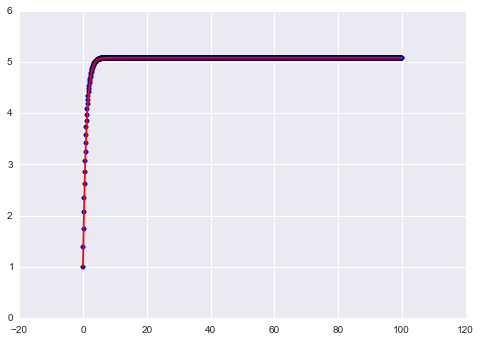

In [94]:
plt.scatter(ts, ks)#
plt.plot(ts, initial_capital_polynomial(ts), 'r-')
plt.show()

In [52]:
# now lets plot the solution
visualizer = pycollocation.Visualizer(solver)


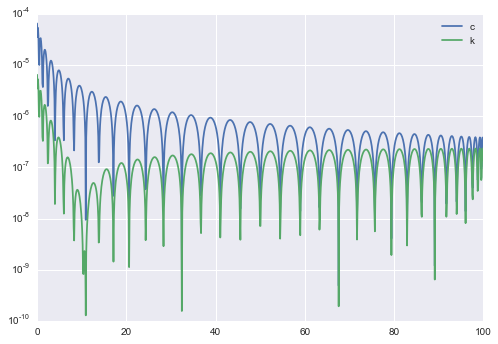

In [97]:
# plot the normalized residuals (they should be small everywhere!)
visualizer.normalized_residuals.plot(logy=True)
plt.show()